<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Андрей! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm.sklearn import LGBMRegressor

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

In [3]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

In [5]:
df.sort_index(inplace=True)

In [6]:
# Проверим на монотонность
df.index.is_monotonic

True

In [7]:
# выполним ресемплирование по одному часу
df = df.resample('1H').sum()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

## Анализ

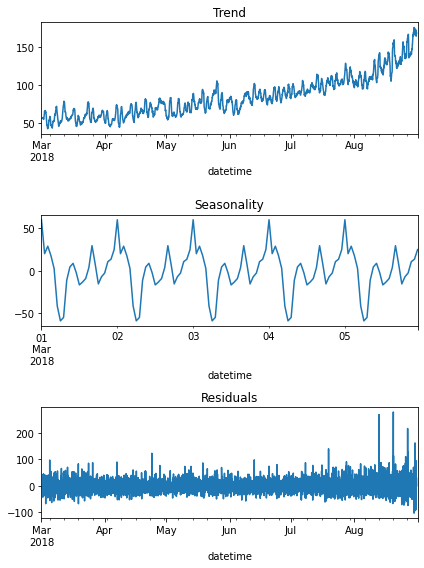

In [8]:
# Разложим временной ряд на тренд и сезоную составляющие
decomposed = seasonal_decompose(df)
plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-05'].plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

 Присутствует общий тренд равномерного роста количества заказов с периодическими небольшими падениями. Это может указывать на постепенное увеличение спроса или развитие бизнеса в данной области.
    Наблюдается сезонность по дням, где заказы достигают минимума в ночное время, затем возрастают с утра и в течение дня, достигая пика к вечеру. Это может указывать на влияние времени суток и поведения потребителей на количество заказов.

Оба этих наблюдения могут быть полезны при прогнозировании и планировании заказов в будущем, а также при принятии решений по оптимизации и управлению предприятием.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что сезонность рассмотрена на уменьшеном временном интервале.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал около месяца, то можно увидеть сезонность внутри недели.</font>

Напишем функцию для создания признаков

In [9]:
def make_features(data, max_lag, rolling_mean_size):
    
    
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    train, test = train_test_split(data, shuffle=False, test_size=0.1)
    train = train.dropna()
    
    features_train = train.drop('num_orders',axis=1)
    features_test = test.drop('num_orders',axis=1)
    target_train = train['num_orders']
    target_test = test['num_orders']

    model = LinearRegression()
    rsme = -cross_val_score(model, features_train, target_train, scoring='neg_root_mean_squared_error', 
                            cv=TimeSeriesSplit(n_splits=5)).mean()
    print(f'RSME = {rsme.round(2)} при lag= {max_lag}')
    return data

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>На мой взгляд: не все признаки подходят, чисто логически. Выскажу свою позицию:<br>

<font color='red'>1) Признак месяц: НЕТ, не подходит, у нас в истории всего один март, май... И данных меньше чем за год. Да и горизонт прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.</s></font><br>
<font color='darkorange'>2) Признак день: НЕТ, также не подходит, у нас нет сезонности внутри месяца, будет просто последовательность чисел.<br></font>
<font color='green'>3) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
4) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>
5) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
6) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.</font> <br>

<font color='red'>Как ты думаешь?</font>

<font color='purple'><b>Убрал признак месяц</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Здорово! Убрали один шумный признак из модели!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что применяешь TimeSeriesSplit для кроссвалидации временных рядов.</font>

Количество лагов будем подбирать перебором(1 час, 3часа, 6 часов, 12 часов, 24 часа) в цикле. Для этого используем функцию создания признаков, результатотм которой будет расчет метрики RSME логистической регресии

In [10]:
lags_list=[1,3,6,12,24]
data_temp =[]
df_new = df.copy()
for i in range(len(lags_list)):
    data_temp.append(make_features(df_new, lags_list[i], 24))
    display(data_temp[i].head())

RSME = 31.81 при lag= 1


,num_orders,day,hour,dayofweek,lag_1,rolling_mean
datetime,,,,,,
2018-03-01 00:00:00,124,1,0,3,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN
2018-03-01 02:00:00,71,1,2,3,85.0,NaN
2018-03-01 03:00:00,66,1,3,3,71.0,NaN
2018-03-01 04:00:00,43,1,4,3,66.0,NaN


RSME = 31.72 при lag= 3


,num_orders,day,hour,dayofweek,lag_1,rolling_mean,lag_2,lag_3
datetime,,,,,,,,
2018-03-01 00:00:00,124,1,0,3,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,2,3,85.0,NaN,124.0,NaN
2018-03-01 03:00:00,66,1,3,3,71.0,NaN,85.0,124.0
2018-03-01 04:00:00,43,1,4,3,66.0,NaN,71.0,85.0


RSME = 31.75 при lag= 6


,num_orders,day,hour,dayofweek,lag_1,rolling_mean,lag_2,lag_3,lag_4,lag_5,lag_6
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,2,3,85.0,NaN,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,71.0,NaN,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,4,3,66.0,NaN,71.0,85.0,124.0,NaN,NaN


RSME = 31.62 при lag= 12


,num_orders,day,hour,dayofweek,lag_1,rolling_mean,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
datetime,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,2,3,85.0,NaN,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,71.0,NaN,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,4,3,66.0,NaN,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RSME = 27.15 при lag= 24


,num_orders,day,hour,dayofweek,lag_1,rolling_mean,lag_2,lag_3,lag_4,lag_5,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,2,3,85.0,NaN,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,71.0,NaN,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,4,3,66.0,NaN,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Минимальное значение RSME при lag= 24, используем это значение параметра для дальнейшего исследования. Сделаем тестовую выборку размером 10% от исходных данных.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [11]:
train, test = train_test_split(data_temp[4], shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders',axis=1)
features_test = test.drop('num_orders',axis=1)
target_train = train['num_orders']
target_test = test['num_orders']
print(features_train.shape,features_test.shape,target_train.shape,target_test.shape)

(3950, 28) (442, 28) (3950,) (442,)


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Обучение

Проведем обученине разных моделей.

In [12]:
model_dt = DecisionTreeRegressor(random_state=12345)
param_grid = {
    "max_depth" : range(15,16),
    "min_samples_leaf" : range(20,30)
}
gsearch = GridSearchCV(model_dt, param_grid = param_grid, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5))
dt_model = gsearch.fit(features_train,target_train)
print(f'Лучшая RMSE: {-dt_model.best_score_} при параметрах {dt_model.best_params_}')

Лучшая RMSE: 28.776013240838164 при параметрах {'max_depth': 15, 'min_samples_leaf': 27}


Лучшая RMSE: 28.776013240838164 при параметрах {'max_depth': 15, 'min_samples_leaf': 27}

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное.</font>

In [13]:
model_rf= RandomForestRegressor(random_state=12345)
param_grid = {
    "max_depth" : range(15,16),
    "min_samples_leaf" : range(2,3)
}
gsearch = GridSearchCV(model_rf, param_grid = param_grid, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5))
rf_model = gsearch.fit(features_train,target_train)
print(f'Лучшая RMSE: {-rf_model.best_score_} при параметрах ,{rf_model.best_params_}')

Лучшая RMSE: 25.35268951494489 при параметрах ,{'max_depth': 15, 'min_samples_leaf': 2}


Лучшая RMSE: 25.341199962902714 при параметрах ,{'max_depth': 15, 'min_samples_leaf': 2}

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [14]:
model_lr = LinearRegression() 
model_lr.fit(features_train, target_train)
 
predictions = model_lr.predict(features_train)  
print("RMSE:",mean_squared_error(target_train,predictions,squared= False))

RMSE: 25.840280269683703


RMSE: 45.81094888906951

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Выбирать модели на тестовых данных нельзя - так мы подстраиваемся конкретно под тест. Тестирование - для контроля переобучения моделей. </s></font>

<font color='purple'><b>Изменил</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Оценку модели следует проводить либо на валидационных данных, либо кроссвалидацией. predict(train) не покажет способность модели работать с новыми данными, на которых модель не обучалась.</font>

In [15]:
model_lgbm= LGBMRegressor(random_state=12345, n_jobs=2)

param_grid = {
    "max_depth" : range(11,12),
    "n_estimators" : range(56,57)
}

gsearch = GridSearchCV(model_lgbm, param_grid = param_grid, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5))
lgb_model = gsearch.fit(features_train,target_train)
print(f'Лучшая RMSE: {-lgb_model.best_score_} при параметрах ,{lgb_model.best_params_}')

Лучшая RMSE: 25.02858278060469 при параметрах ,{'max_depth': 11, 'n_estimators': 56}


Лучшая RMSE: 24.87613969873619 при параметрах ,{'max_depth': 11, 'n_estimators': 56}

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Cравним RSME, проведя кроссвалидацию на трейне по каждой из рассматриваемых моделей:

In [16]:
RSME_dt = -cross_val_score(model_dt, features_train, target_train, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5)).mean()
RSME_rf = -cross_val_score(model_rf, features_train, target_train, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5)).mean()
RSME_lr = -cross_val_score(model_lr, features_train, target_train, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5)).mean()
RSME_lgbm = -cross_val_score(lgb_model, features_train, target_train, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5)).mean()
print(RSME_dt,RSME_rf,RSME_lr,RSME_lgbm)

35.724513364476124 25.333820395009887 27.14826372161077 25.02858278060469


35.473571300220584 25.25233345532437 26.941338395918326 24.87613969873619

Минимальное значение RSME(24.876) при обучении модели LightGBM.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Тестирование

Проверем данные на тестовой выборке

In [17]:
dt_model_test = dt_model.fit(features_train,target_train)
dt_predictions = dt_model_test.predict(features_test)
RSME_dt_test = mean_squared_error(target_test, dt_predictions,squared= False)

In [18]:
rf_model_test = rf_model.fit(features_train,target_train)
rf_predictions = rf_model_test.predict(features_test)
RSME_rf_test = mean_squared_error(target_test, rf_predictions,squared= False)

In [19]:
lr_model_test = model_lr.fit(features_train,target_train)
lr_predictions = lr_model_test.predict(features_test)
RSME_lr_test = mean_squared_error(target_test, lr_predictions,squared= False)

In [20]:
lgb_model_test = lgb_model.fit(features_train,target_train)
lgb_predictions = lgb_model_test.predict(features_test)
RSME_lgb_test = mean_squared_error(target_test, lgb_predictions,squared= False)

In [21]:
print(RSME_dt_test,RSME_rf_test,RSME_lr_test,RSME_lgb_test)

56.188282345206964 43.35978664656788 45.16859297010218 42.56264231785304


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

56.188282345206964 43.11046723577575 45.81094888906951 41.65291089352744

Лучший результат у модели градиентного бустинга LGBMRegressor (41,65), что соответствует условию заказчика - значение метрики RMSE на тестовой выборке должно быть не больше 48.

ИТОГИ:\
Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Была построена модель для такого предсказания.
Условия заказчика: Значение метрики RMSE на тестовой выборке должно быть не больше 48.
Ход выполнению проекта

    Загрузка данных и их ресемплирование по одному часу.
    Анализ данных.
    Обучены разные модели с различными гиперпараметрами. 
    Проверка данных на тестовой.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'> Андрей, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не используй признак "месяц" на данных меньше года.</font></ul>
<ul><font color='red'>Для выбора моделей используй результаты кроссвалидации.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Андрей, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb \
Или [Предсказываем будущее с помощью библиотеки Facebook Prophet](https://habr.com/ru/company/ods/blog/323730/)
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48